In [104]:
from PIL import Image
from numpy import asarray
import imageio
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from skimage.color import rgb2lab, deltaE_cie76
from collections import Counter
import os 
import cv2
import matplotlib.image as img
import pandas as pd
from scipy.cluster.vq import whiten
from PIL import Image
import sys
import os
import os.path
from os import path
import math 
import matplotlib.cm as cm
from scipy.stats import gaussian_kde

## Reading Images

In [114]:
# red
redimage = Image.open('/Users/macboss/Desktop/final data/shot_red_marilyn_1964-19604.png')
# convert image to numpy array
red_data = asarray(redimage)
# create Pillow image
REDimage = Image.fromarray(red_data)

# blue
blueimage = Image.open('/Users/macboss/Desktop/final data/shot_blue_marilyn_1964-19604.jpg')
# convert image to numpy array
blue_data = asarray(blueimage)
# create Pillow image
BLUEimage = Image.fromarray(blue_data)

# sage blue
sageblueimage = Image.open('/Users/macboss/Desktop/final data/shot_eggblue_marilyn_1964-19604.png')
# convert image to numpy array
sageblue_data = asarray(sageblueimage)
# create Pillow image
sageBLUEimage = Image.fromarray(sageblue_data)

# orange
orangeimage = Image.open('/Users/macboss/Desktop/final data/shot_orange_marilyn_1964-19604.png')
# convert image to numpy array
orange_data = asarray(orangeimage)
# create Pillow image
ORANGEimage = Image.fromarray(orange_data)

# turquoise
turqimage = Image.open('/Users/macboss/Desktop/final data/shot_turq_marilyn_1964-19604.png')
# convert image to numpy array
turq_data = asarray(turqimage)
# create Pillow image
TURQimage = Image.fromarray(turq_data)

# image data
image_data = [red_data, blue_data, sageblue_data, orange_data, turq_data]
# image names
names = ['Red:', 'Light Blue:', 'Sage Blue:', 'Orange:', 'Turquoise:' ]
#image paths
image_paths = ['/Users/macboss/Desktop/final data/shot_red_marilyn_1964-19604.png',
              '/Users/macboss/Desktop/final data/shot_blue_marilyn_1964-19604.jpg',
              '/Users/macboss/Desktop/final data/shot_eggblue_marilyn_1964-19604.png',
              '/Users/macboss/Desktop/final data/shot_orange_marilyn_1964-19604.png',
              '/Users/macboss/Desktop/final data/shot_turq_marilyn_1964-19604.png']

## Dominant Colors

In [115]:
import scipy.cluster
import sklearn.cluster
import numpy
from PIL import Image

def dominant_colors(image):  # PIL image input
    ar = numpy.asarray(image)
    shape = ar.shape
    ar = ar.reshape(numpy.product(shape[:2]), shape[2]).astype(float)

    kmeans = sklearn.cluster.MiniBatchKMeans(
        n_clusters=10,
        init="k-means++",
        max_iter=20,
        random_state=1000
    ).fit(ar)
    codes = kmeans.cluster_centers_

    vecs, _dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
    counts, _bins = numpy.histogram(vecs, len(codes))    # count occurrences

    colors = []
    for index in numpy.argsort(counts)[::-1]:
        colors.append(tuple([int(code) for code in codes[index]]))
    return colors                    # returns colors in order of dominance

In [116]:
# function for histogram of top 10 dominant colors

def color_histogram(colors):
    
    # number of dominant colors
    num_colors = len(colors)

    # array of color labels
    labels = np.arange(num_colors)

    # array of color frequencies
    frequencies = np.ones(num_colors) / num_colors

    # bar plot of the histogram
    plt.bar(labels, frequencies, color= np.array(colors) / 255)
    plt.xlabel('Color')
    plt.ylabel('Frequency')
    plt.title('Dominant Color Histogram')
    plt.xticks(labels)
    plt.show()

Red:
 


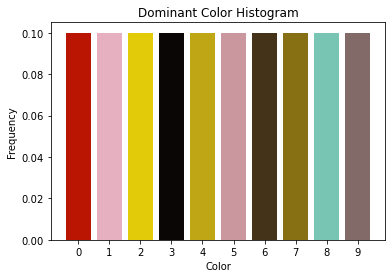

Light Blue:
 


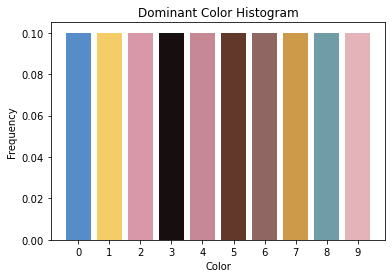

Sage Blue:
 


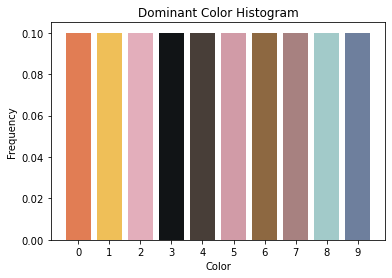

Orange:
 


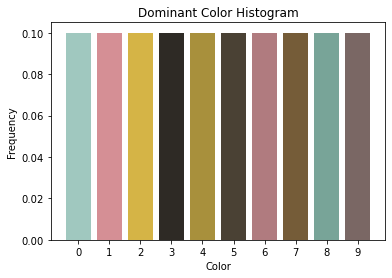

Turquoise:
 


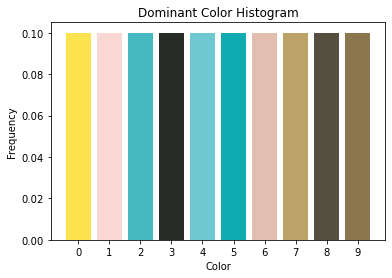

In [117]:
# show plots 
images = [REDimage, BLUEimage, ORANGEimage, EGGBLUEimage, TURQimage]

i = 0
for image in images:
    print(names[i])
    print(' ')
    color_histogram(dominant_colors(image))
    i += 1

## Basic RGB Analysis

In [120]:
# average RGB

def compute_average_image_color(img_path):

    if not os.path.isfile(img_path):
        print(img_path, 'DONT EXISTS, EXIT')
        sys.exit()

    # read in images
    img = Image.open(img_path).convert('RGBA')
    img = img.resize((50,50)) # resize for efficiency

    width, height = img.size
    r_total = 0
    g_total = 0
    b_total = 0
    count = 0
    red_list=[]
    green_list=[]
    blue_list=[]
    
    # iterate over each pixel
    for x in range(0, width):
        for y in range(0, height):
            r, g, b, alpha = img.getpixel((x,y))
            
            if alpha !=0:
                red_list.append(r)
                green_list.append(g)
                blue_list.append(b)
            
                r_total += r
                g_total += g
                b_total += b
                count += 1

    # avg, min, max rgb     
    average_color=(round(r_total/count), round(g_total/count), round(b_total/count))
    print(average_color)
    
    red_list.sort()
    green_list.sort()
    blue_list.sort()

    red_min_max=[]
    green_min_max=[]
    blue_min_max=[]
    
    red_min_max.append(min(red_list))
    red_min_max.append(max(red_list))
    green_min_max.append(min(green_list))
    green_min_max.append(max(red_list))
    blue_min_max.append(min(blue_list))
    blue_min_max.append(max(blue_list))
    
    print('red_min_max: ', red_min_max)
    print('green_min_max: ', green_min_max)
    print('blue_min_max: ', blue_min_max)

    #variance and standard deviation
    red_stddev=round(math.sqrt(np.var(red_list)))
    green_stddev=round(math.sqrt(np.var(green_list)))
    blue_stddev=round(math.sqrt(np.var(blue_list)))

    print('red_stddev: ', red_stddev)
    print('green_stddev: ', green_stddev)
    print('blue_stddev: ', blue_stddev)

In [121]:
# run avg rbg function
for image_path, name in zip(image_paths, names):
    print(name)
    compute_average_image_color(image_path)
    print(' ')

Red:
(170, 104, 58)
red_min_max:  [0, 250]
green_min_max:  [0, 250]
blue_min_max:  [0, 218]
red_stddev:  69
green_stddev:  77
blue_stddev:  78
 
Light Blue:
(138, 132, 137)
red_min_max:  [0, 255]
green_min_max:  [0, 255]
blue_min_max:  [0, 215]
red_stddev:  72
green_stddev:  49
blue_stddev:  62
 
Sage Blue:
(163, 153, 127)
red_min_max:  [32, 228]
green_min_max:  [27, 228]
blue_min_max:  [22, 203]
red_stddev:  48
green_stddev:  48
blue_stddev:  57
 
Orange:
(193, 134, 101)
red_min_max:  [0, 255]
green_min_max:  [0, 255]
blue_min_max:  [0, 224]
red_stddev:  65
green_stddev:  46
blue_stddev:  48
 
Turquoise:
(154, 178, 143)
red_min_max:  [0, 255]
green_min_max:  [27, 255]
blue_min_max:  [30, 251]
red_stddev:  88
green_stddev:  53
blue_stddev:  64
 


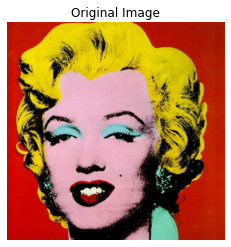

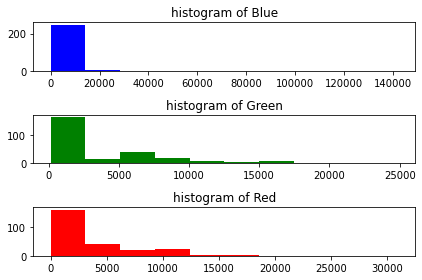

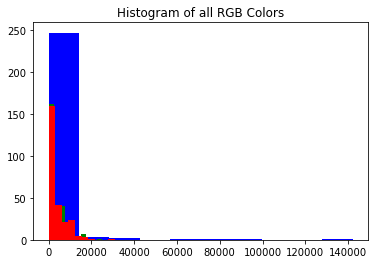

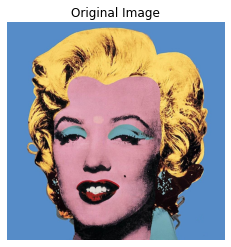

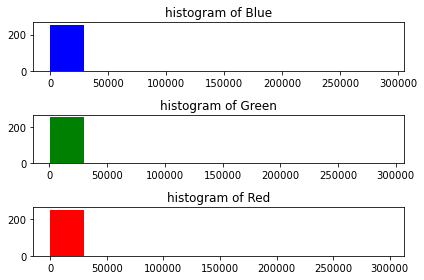

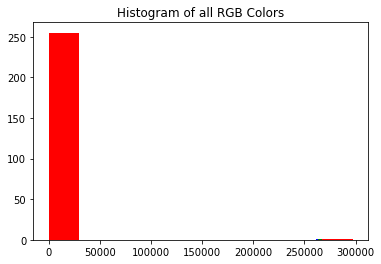

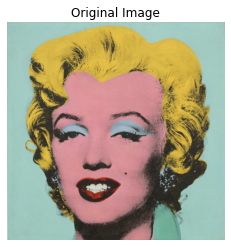

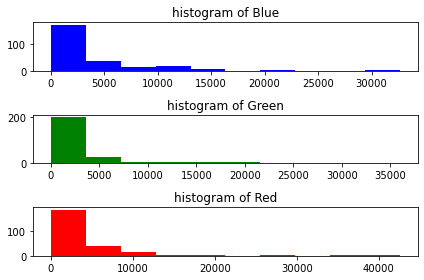

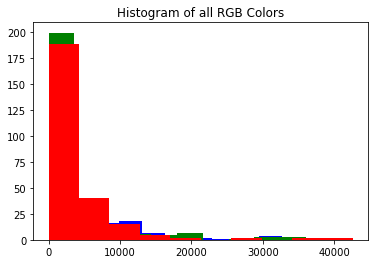

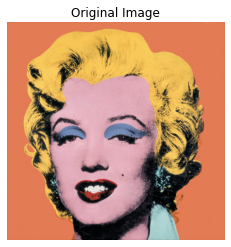

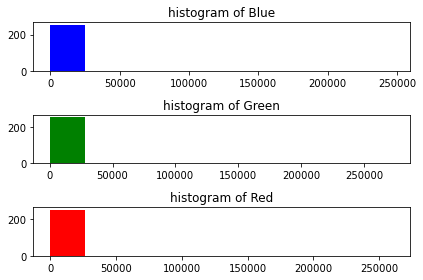

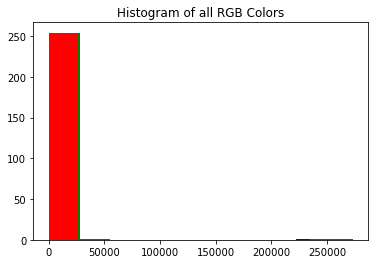

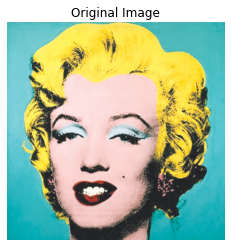

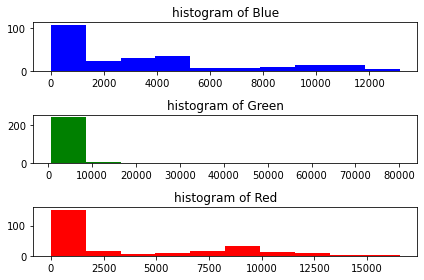

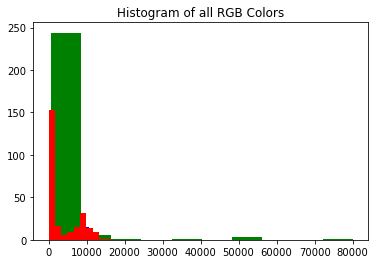

In [122]:
# RGB histograms

for image_path in image_paths:
    # load image
    imageObj = cv2.imread(image_path)
    # to avoid grid lines
    plt.axis("off")
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(imageObj, cv2.COLOR_BGR2RGB))
    plt.show()

    # extract rgb
    blue_color = cv2.calcHist([imageObj], [0], None, [256], [0, 256])
    red_color = cv2.calcHist([imageObj], [1], None, [256], [0, 256])
    green_color = cv2.calcHist([imageObj], [2], None, [256], [0, 256])

    # histograms for each color
    plt.subplot(3, 1, 1)
    plt.title("histogram of Blue")
    plt.hist(blue_color, color="blue")

    plt.subplot(3, 1, 2)
    plt.title("histogram of Green")
    plt.hist(green_color, color="green")

    plt.subplot(3, 1, 3)
    plt.title("histogram of Red")
    plt.hist(red_color, color="red")

    
    plt.tight_layout()
    plt.show()

    # combined histogram
    plt.title("Histogram of all RGB Colors")
    plt.hist(blue_color, color="blue")
    plt.hist(green_color, color="green")
    plt.hist(red_color, color="red")
    plt.show()

## Hue & Saturation Analysis

Red:
 


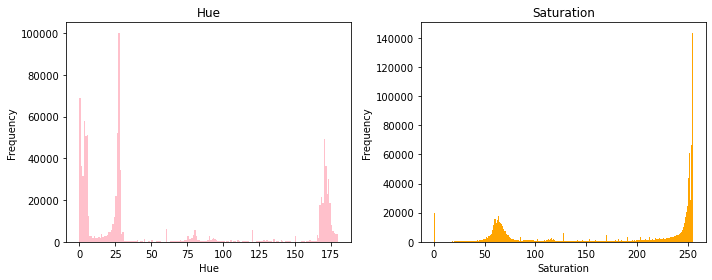

Light Blue:
 


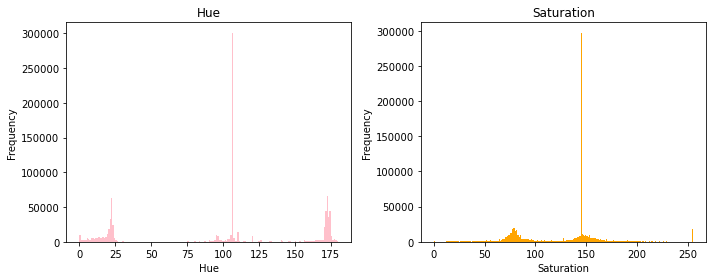

Sage Blue:
 


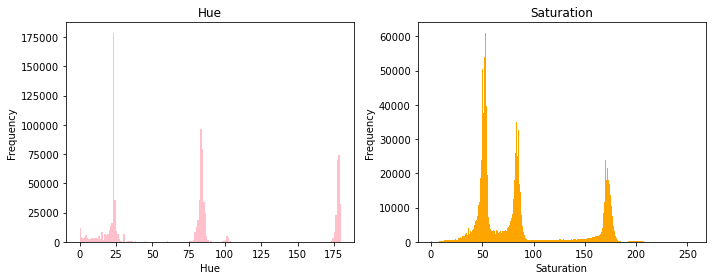

Orange:
 


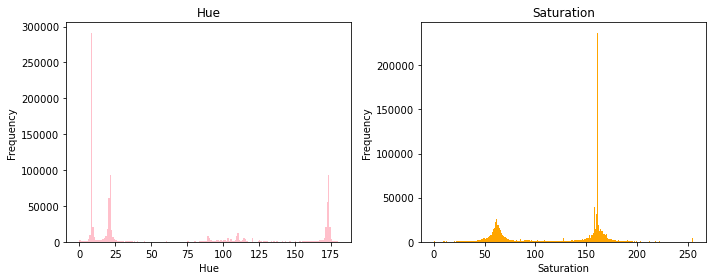

Turquoise:
 


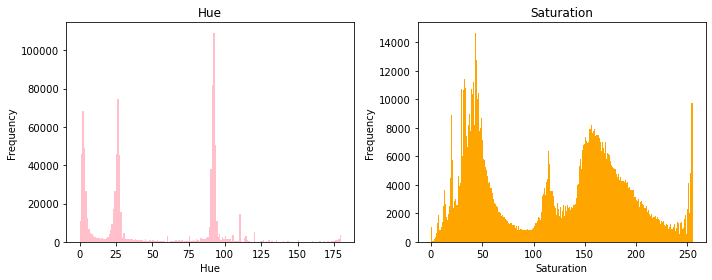

In [123]:
# histogram for hue and saturation

# graph titles
hue_titles = ['Red Image: Hue', 'Blue Image: Hue', 'Egg Blue Image: Hue', 
              'Orange Image: Hue', 'Turquoise Image: Hue']
saturation_titles = ['Red Image: Saturation', 'Blue Image: Saturation', 'Egg Blue Image: Saturation', 
              'Orange Image: Saturation', 'Turquoise Image: Saturation']

def hue_and_saturation(color):
    # convert to uint8 format
    color = color.astype(np.uint8)

    # convert to hsv
    hsv = cv2.cvtColor(color, cv2.COLOR_RGB2HSV)

    # hue and saturation values
    hue_vals = hsv[:, :, 0].flatten()
    sat_vals = hsv[:, :, 1].flatten()

    # histograms for hue values
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(hue_vals, bins=180, range=(0, 180), color='pink')
    plt.title('Hue')
    plt.xlabel('Hue')
    plt.ylabel('Frequency')

    # histogram for saturation values
    plt.subplot(1, 2, 2)
    plt.hist(sat_vals, bins=256, range=(0, 255), color='orange')
    plt.title('Saturation')
    plt.xlabel('Saturation')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    

# histograms
i = 0
for image in image_data:
    print(names[i])
    print(' ')
    hue_and_saturation(image)
    i += 1

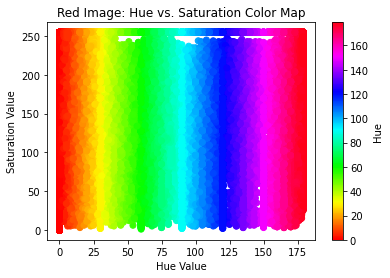

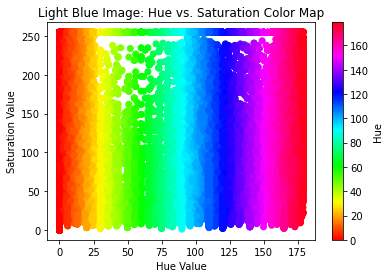

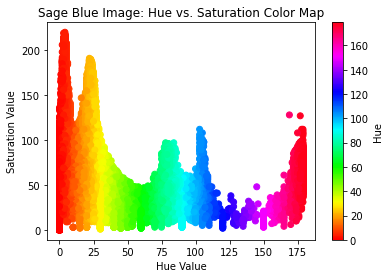

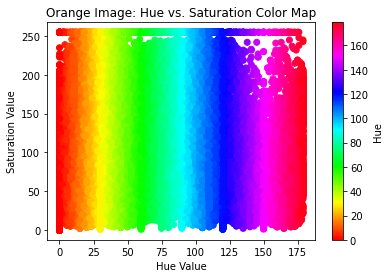

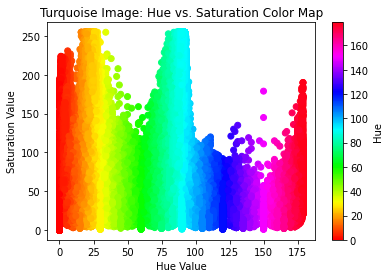

In [132]:
# function to  extract saturation values
def saturation_values(color):
    # convert to uint8 
    color = color.astype(np.uint8)

    # hsv
    hsv = cv2.cvtColor(color, cv2.COLOR_RGB2HSV)

    # extract the saturation values
    sat_vals = hsv[:, :, 1].flatten()

    return sat_vals

# function to extract hue values
def hue_values(color):
    #convert to uint8 
    color = color.astype(np.uint8)

    # hsv
    hsv = cv2.cvtColor(color, cv2.COLOR_RGB2HSV)

    # extract the hue values
    hue_vals = hsv[:, :, 0].flatten()

    return hue_vals

# titles for each graph
titles = ['Red Image: Hue vs. Saturation Color Map', 'Light Blue Image: Hue vs. Saturation Color Map', 
          'Sage Blue Image: Hue vs. Saturation Color Map', 'Orange Image: Hue vs. Saturation Color Map', 
          'Turquoise Image: Hue vs. Saturation Color Map']

i = 0
for image_path in image_paths:

    # read in the images
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # use functions above to extract hue and saturation values from image
    hue_vals = hue_values(image)
    sat_vals = saturation_values(image)

    # create a scatter plot for hue vs saturation
    plt.scatter(hue_vals, sat_vals, c=hue_vals, cmap=cm.hsv)
        
    plt.xlabel('Hue Value')
    plt.ylabel('Saturation Value')
    plt.title(titles[i]) 
    plt.colorbar(label='Hue')
    plt.show()
    
    i += 1 

## Kernel Density Information (KDE)

In [125]:
# define function to compute kde
def img_to_rgbk(image, bw=0.1, sample_size=10000):
    # convert the image to array
    img_array = np.array(image)

    # RGB format
    rgb = img_array.reshape(-1, 3).T

    # sample a subset of pixels for kernel density estimation
    sample_indices = np.random.choice(rgb.shape[1], size=sample_size, replace=False)
    rgb_sample = rgb[:, sample_indices]

    # compute KDE
    kde = gaussian_kde(rgb_sample, bw_method=bw)
    k = kde(rgb_sample)

    # separate the RGB channels
    r, g, b = rgb_sample

    return r, g, b, k

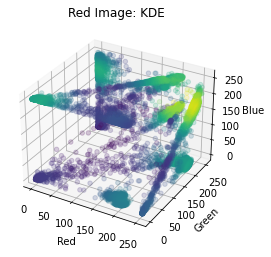

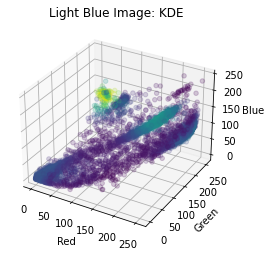

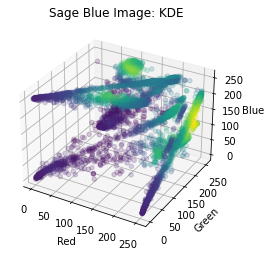

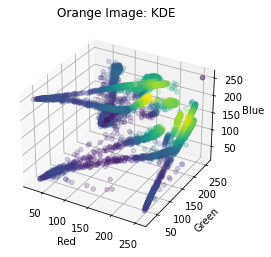

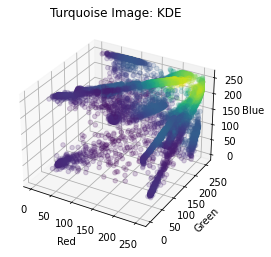

In [133]:
# plot titles
kde_titles = ['Red Image: KDE', 'Light Blue Image: KDE', 'Sage Blue Image: KDE', 'Orange Image: KDE', 
              'Turquoise Image: KDE']

i = 0
for image in images:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    img = np.array(image)

    r, g, b, k = img_to_rgbk(img, bw=0.5)
    ax.scatter(r, g, b, c=k, alpha=0.2)
    
    # axes label
    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    
    plt.title(kde_titles[i])
    plt.show()
    
    i += 1

## Chromaticity

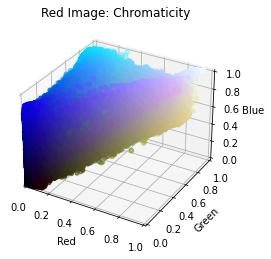

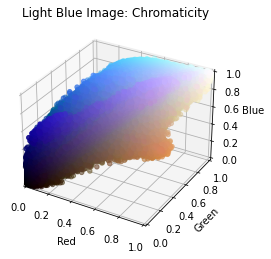

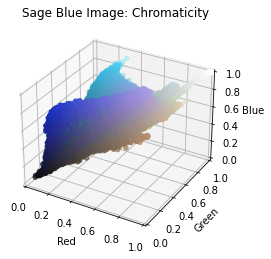

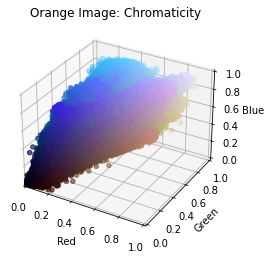

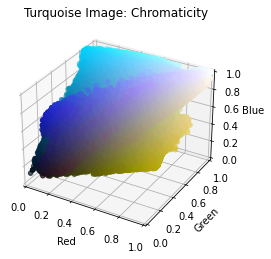

In [134]:
# titles
titles = ['Red Image: Chromaticity', 'Light Blue Image: Chromaticity', 'Sage Blue Image: Chromaticity',
         'Orange Image: Chromaticity', 'Turquoise Image: Chromaticity']

i = 0
for image_path in image_paths:
        
    # load the image
    image = cv2.imread(image_path)

    # resize the image
    resized_image = cv2.resize(image, (600, 600))

    # convert the resized image to float32
    resized_float = image.astype(np.float32)

    # normalize the pixel values to the range [0, 1]
    normalized_image = resized_float / 255.0

    # reshape the image to a 1D array
    pixels = normalized_image.reshape(-1, 3)

    # empty 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # extract RGB components
    r = pixels[:, 0]
    g = pixels[:, 1]
    b = pixels[:, 2]

    # plot the points in the RGB space
    ax.scatter(r, g, b, c=pixels)

    # axis labels
    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')

    # axis limits
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_zlim([0, 1])

    # show plot
    plt.title(titles[i])
    plt.show()
    
    i += 1

## RGB Normalization

/var/folders/br/x_qrwj194hx26btv1r9wqblc0000gn/T/ipykernel_99744/812342184.py:15: RuntimeWarning: invalid value encountered in true_divide
  normalized_image = np.divide(resized_float, rgb_sum[:, :, np.newaxis])


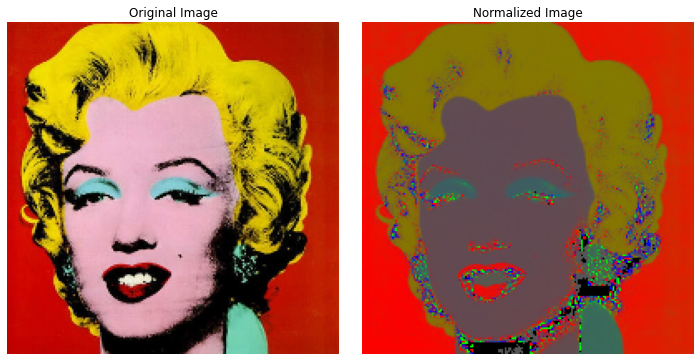

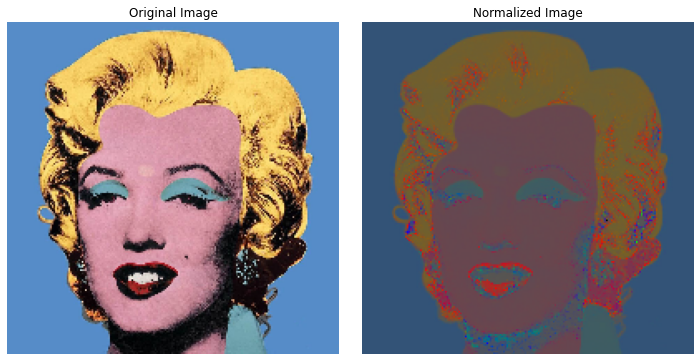

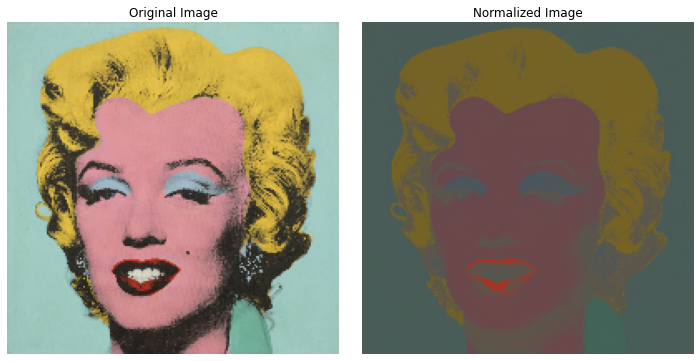

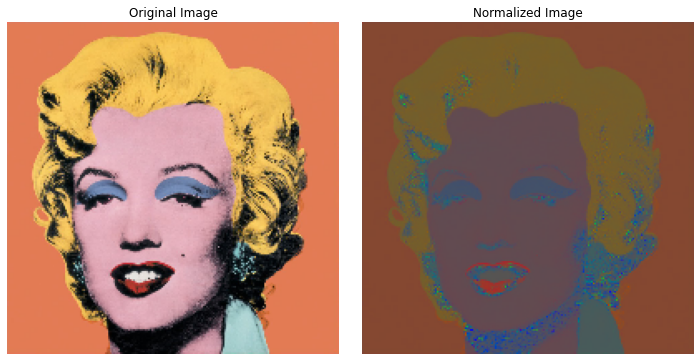

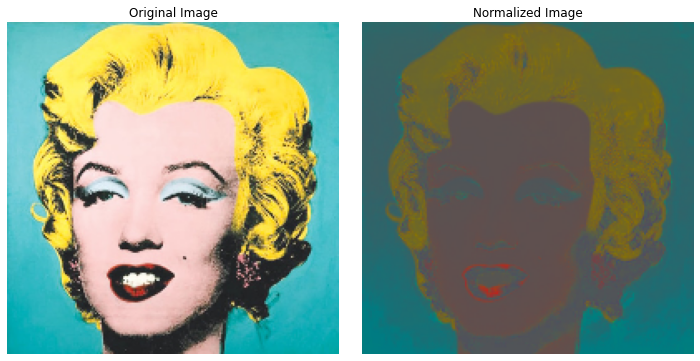

In [128]:
for image_path in image_paths:
    # load images
    image = cv2.imread(image_path)

    # resize for faster computation
    resized_image = cv2.resize(image, (200, 200))

    # convert to float32
    resized_float = resized_image.astype(np.float32)

    # sum of RGB values
    rgb_sum = np.sum(resized_float, axis=2)

    # mormalize RGB values
    normalized_image = np.divide(resized_float, rgb_sum[:, :, np.newaxis])

    # convert to uint8
    normalized_uint8 = (normalized_image * 255).astype(np.uint8)

    # display image
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # original image
    axes[0].imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # normalized image
    axes[1].imshow(cv2.cvtColor(normalized_uint8, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Normalized Image')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()
    

## Facial Feature Detection

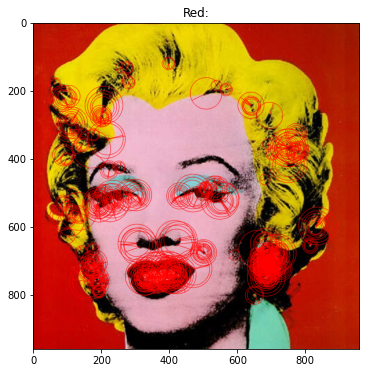

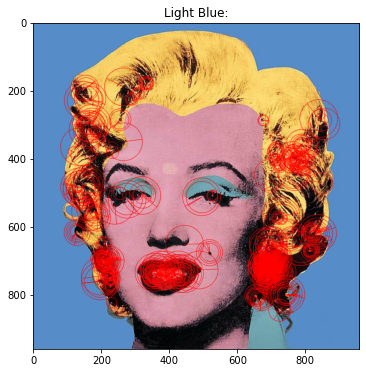

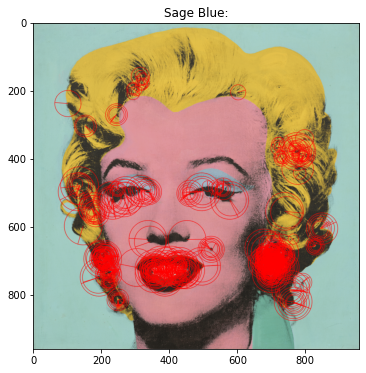

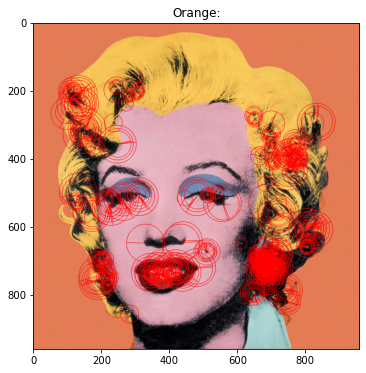

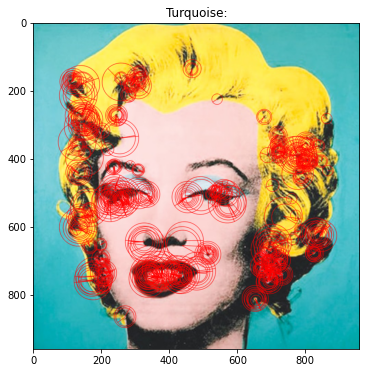

In [129]:
# draw keypoints of facial features

i = 0
for image_path in image_paths: 
        
    # load each image
    image = cv2.imread(image_path)

    # convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # initialize the ORB detector
    orb = cv2.ORB_create()

    # detect keypoints and compute descriptors
    keypoints, descriptors = orb.detectAndCompute(gray_image, None)

    # draw keypoints 
    keypoints_image = cv2.drawKeypoints(image, keypoints, None, color=(0, 0, 255), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # convert BGR image to RGB 
    rgb_img = cv2.cvtColor(keypoints_image, cv2.COLOR_BGR2RGB)

    # display images
    plt.figure(figsize=(8, 6))
    plt.imshow(rgb_img)
    plt.title(names[i])
    plt.show()
    
    i +=1

## References:

https://stackoverflow.com/questions/3241929/python-find-dominant-most-common-color-in-an-image

https://www.tutorialspoint.com/how-to-adjust-the-hue-of-an-image-in-pytorch

https://www.geeksforgeeks.org/visualizing-colors-in-images-using-histogram-in-python/

https://medium.com/analytics-vidhya/understanding-keypoints-and-orb-algorithm-f260e6fb640c

https://stackoverflow.com/questions/53826201/how-to-represent-density-information-on-a-matplotlib-3-d-scatter-plot